In [9]:
import pickle
pickle_in = open("XX.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("yy.pickle","rb")
y = list(pickle.load(pickle_in))

In [10]:
X.shape

(603, 150, 150, 3)

In [11]:
X = X/ 255.0

In [12]:
Y = []
y = list(y)
print(y[0])
for i in range(603):
    if(y[i] == 'Anan'):
        Y.append('0')
    elif(y[i] == 'Angad'):
        Y.append('1')
    else:
        Y.append('2')
print(Y)
Y = [Y]

Angad
['1', '0', '1', '0', '1', '2', '1', '0', '0', '0', '0', '2', '2', '0', '1', '2', '1', '0', '0', '2', '1', '2', '0', '2', '2', '2', '1', '2', '0', '2', '0', '1', '0', '1', '2', '0', '0', '2', '2', '2', '2', '1', '0', '2', '0', '0', '0', '2', '1', '0', '0', '2', '1', '0', '1', '1', '2', '1', '1', '2', '0', '0', '1', '1', '1', '1', '1', '0', '2', '1', '2', '2', '1', '0', '1', '0', '2', '1', '0', '1', '2', '0', '1', '0', '2', '0', '1', '2', '1', '0', '2', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '2', '2', '2', '0', '1', '1', '1', '0', '1', '0', '2', '0', '1', '0', '2', '2', '0', '0', '1', '1', '0', '2', '0', '1', '1', '0', '2', '2', '1', '1', '0', '0', '0', '2', '2', '2', '1', '0', '2', '2', '2', '2', '0', '2', '2', '0', '2', '0', '1', '0', '2', '2', '0', '1', '2', '1', '0', '2', '2', '1', '2', '1', '2', '0', '2', '1', '2', '1', '1', '1', '1', '0', '0', '1', '2', '0', '2', '2', '2', '2', '1', '2', '1', '1', '0', '2', '2', '1', '2', '0', '0', '2', '2', '1', '0', '0', '1', '1'

In [13]:
import tensorflow as tf

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation ='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
        
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

from tensorflow.keras.optimizers import RMSprop 
model.compile(optimizer = RMSprop(lr=0.001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)       

In [15]:
model.fit(X,Y,epochs=10)


Train on 603 samples
Epoch 1/10
603/603 [==============================] - 147s 243ms/sample - loss: 1.3206 - accuracy: 0.3748
Epoch 2/10
603/603 [==============================] - 142s 236ms/sample - loss: 1.0355 - accuracy: 0.5075
Epoch 3/10
603/603 [==============================] - 148s 246ms/sample - loss: 0.8658 - accuracy: 0.5821
Epoch 4/10
603/603 [==============================] - 188s 311ms/sample - loss: 0.7714 - accuracy: 0.6750
Epoch 5/10
603/603 [==============================] - 145s 241ms/sample - loss: 0.6735 - accuracy: 0.7197
Epoch 6/10
603/603 [==============================] - 145s 241ms/sample - loss: 0.5678 - accuracy: 0.7927
Epoch 7/10
603/603 [==============================] - 144s 238ms/sample - loss: 0.5070 - accuracy: 0.7778
Epoch 8/10
603/603 [==============================] - 145s 240ms/sample - loss: 0.4614 - accuracy: 0.8126
Epoch 9/10
603/603 [==============================] - 137s 227ms/sample - loss: 0.3475 - accuracy: 0.8806
Epoch 10/10
603/603 [====

In [16]:
import numpy as np
test_list = []

img_path = 'C:/Users/FLASH/Desktop/coursera/project_dataset/test/'   
import os
import cv2
import matplotlib.pyplot as plt
for img in os.listdir(img_path): 
    # iterate over each image per dogs and cats
    img_array = cv2.imread(os.path.join(img_path,img) ,cv2.IMREAD_COLOR)  # convert to array
    plt.imshow(img_array, cmap='gray')  # graph it
    
    new_array = cv2.resize(img_array,(150,150))
    XX = new_array.reshape(150,150, 3)/255.0
    test_list.append(XX)
    plt.show() 

## reshaping the list    
test_list = np.array(test_list).reshape(len(test_list),150,150,3)
test_list.shape

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

(5, 150, 150, 3)

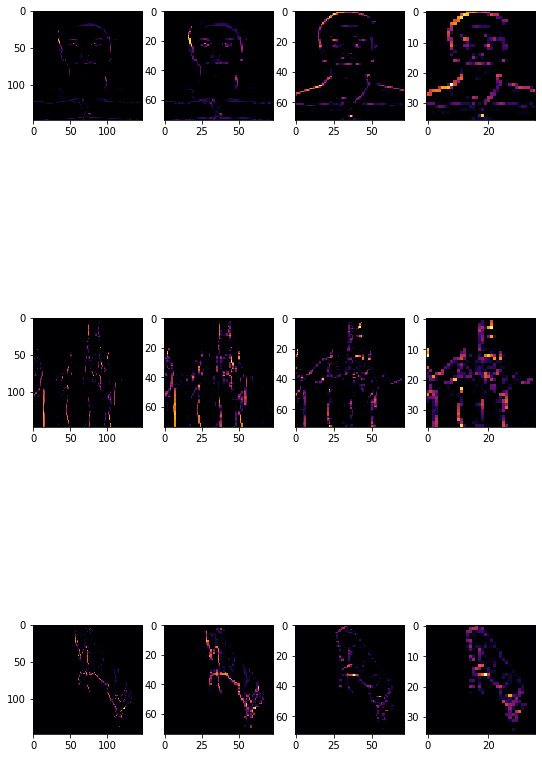

In [17]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
fig = plt.gcf()
fig.set_size_inches(9, 16)
FIRST_IMAGE=0
SECOND_IMAGE=1
THIRD_IMAGE=2
CONVOLUTION_NUMBER = 0
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_list[FIRST_IMAGE].reshape(1, 150,150, 3))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_list[SECOND_IMAGE].reshape(1,150,150, 3))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_list[THIRD_IMAGE].reshape(1, 150,150, 3))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

[0.01334234 0.05853473 0.92812294]
0.92812294
It's Achintya


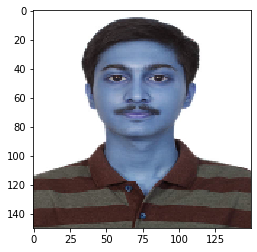

In [18]:
pred = model.predict(test_list)
x = 0
print(pred[x])
t=max(pred[x])
print(t)
for i in range(len(pred[x])):
    if(t == pred[x][i]):
        if (i == 0):
            print("It's a Anam")
        elif (i == 1):
            print("It's a Angad")
        else :
            print("It's Achintya")

img = np.array(test_list[x]).reshape(150,150,3)
plt.imshow(img)